# Homework 6
## Jiaxin Li  77664780

In this homework, you're asked to write the functions of ordinary least square (OLS) regression with Numpy. Please fill the code block cells with your code and comments, run everything (select cell in the menu, and click Run all), save the notebook, and upload it to canvas.

**For this homework, you should write your code with basic Python or Numpy, and are not allowed to use any other packages/functions in Scikit-Learn, except for loading the data (codes provided below).**


In [6]:
# import the packages
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import inv

Next, you can define the functions to 1) fit the parameters `beta_hats` 2) generate the predictions `y_hat`.

For linear algebra operations in Numpy, you can consult [here](https://numpy.org/doc/stable/reference/routines.linalg.html). Please also refer to the discussion file to see how to import and use the functions in linear algebra submodule of Numpy.

The most tricky part is about dealing with the intercepts $\beta_{0}$, while I have already done it for you in the fitting function.

In [7]:
def OLSfit(data, y):
    
    '''This function takes a data matrix, and a colum vector of a variable that you want to investigate as inputs, output will be a column
        vector that could assign each variable proper wieght that could best estimate the variable that you want to investigate.
    
    data: the data matrix, in Numpy 2D array format. The rows correspond to observations, and the columns correspond to variables.
    
    
    
    '''
    
    ones = np.ones((data.shape[0],1)) # column of ones 
    X = np.concatenate((ones, data), axis = 1) # the augmented matrix, \tilde{X} in our lecture
    
    
    beta_hats=inv(X.T@X)@X.T@y
    
    
    return beta_hats

In [8]:
def OLSpredict(data, beta_hats):
    
    '''This OLSpredict function takes a n by m data matrix, and a colum vector of m rows as input, it will output a prediction on the variable
    you want to investigate based on beta_hats you get'''
    ones = np.ones((data.shape[0],1)) # column of ones 
    X = np.concatenate((ones, data), axis = 1)
    # write your code here
    y_hat=X@beta_hats
    
    return y_hat

After defining the functions, we can test them with the [boston house pricing dataset](https://www.kaggle.com/vikrishnan/boston-house-prices/notebooks), loaded from scikit-learn.

In [9]:
# load the dataset
from sklearn import datasets
boston = datasets.load_boston()
data = boston['data'] # already in Numpy array format
y = boston['target'] 

In [10]:
# call your function here to generate the prediction y_hat
beta_hats = OLSfit(data,y)
y_hat = OLSpredict(data,beta_hats)

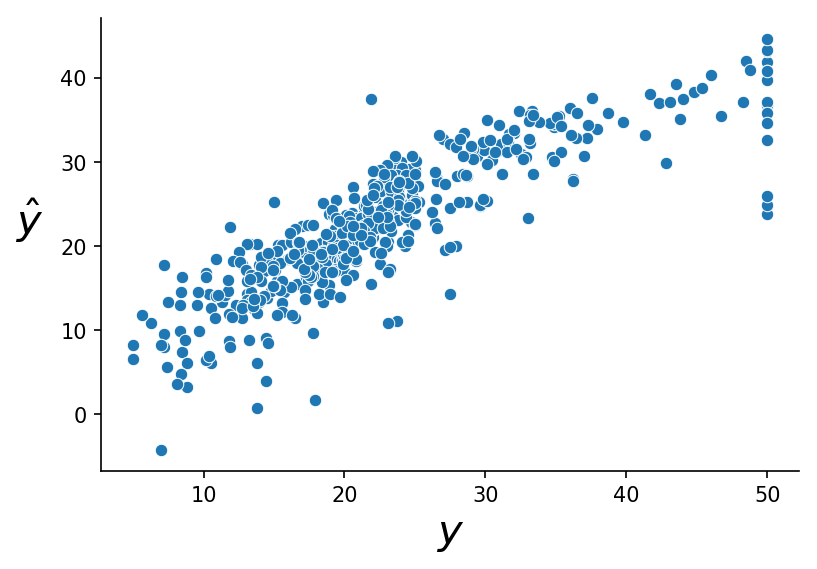

In [11]:
fig, ax = plt.subplots(dpi=150)
sns.scatterplot(x=y, y=y_hat)
ax.set_xlabel(r'$y$', size = 20)
ax.set_ylabel(r'$\hat{y}$', rotation = 0, size = 20, labelpad = 15)




sns.despine()

## Optional Task
Realize the linear regression with OOP. If you choose this task, you don't have to write down the functions in previous section -- just define your class directly. Don't forget to use provided code to generate the figure.

Ideally, the class you defined can include methods such as `fit` and `predict`, and attributes such as `loss`,`y_hat` ...

In [7]:
# write your class of Linear Regression here